In [1]:
import pymongo
import pandas as pd
import numpy as np

from pymongo import MongoClient
from bson.objectid import ObjectId

import datetime

import matplotlib.pyplot as plt

from collections import defaultdict


%matplotlib inline
import json
plt.style.use('ggplot')

import seaborn as sns

from math import log10, floor

In [2]:
## Connect to local DB

client = MongoClient('localhost', 27017)
print ("Setup db access")

Setup db access


In [3]:
#
# Get collections from mongodb
#
#db = client.my_test_db
db = client.test


In [4]:
chunk = 100000
start = 0
end = start + chunk

In [5]:
reponses = db.anon_student_task_responses.find()[start:end]

In [6]:
df_responses = pd.DataFrame(list(reponses))

In [7]:
print (df_responses.head())

                        _id               behavioral_traits  bonus  correct  \
0  5a00f1739100de1a390000d0                              []  False     True   
1  5a00f1739100de1a390000d5  [measuring_tools, orange_tick]  False     True   
2  5a00f1739100de1a390000d9                              []  False     True   
3  5a00f1739100de1a390000dc                              []  False     True   
4  5a00f1739100de1a390000df                              []  False     True   

       diff          id  incomplete         lesson  \
0  0.000000  nvrm82_9Yv       False       nline_1b   
1  0.563288  jVG3p9f-20       False       nline_1b   
2  0.601043  _NUUDSBMum       False  equivalence_0   
3  0.686276  B6HmMEMpoL       False  equivalence_0   
4  0.642014  IYWiIP26on       False  equivalence_0   

                                       level_summary  \
0  {'entered': True, 'path': 'nline_1b', 'lm_stat...   
1  {'entered': True, 'path': 'nline_1b', 'lm_stat...   
2  {'subject': 'fractions', 'uni

In [8]:
## Look act columns
print (df_responses.columns)

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched'],
      dtype='object')


In [9]:
## How many data samples
print (len(df_responses), "Number of entries")

100000 Number of entries


In [10]:
## Example data samle
print (df_responses.iloc[1])

_id                                              5a00f1739100de1a390000d5
behavioral_traits                          [measuring_tools, orange_tick]
bonus                                                               False
correct                                                              True
diff                                                             0.563288
id                                                             jVG3p9f-20
incomplete                                                          False
lesson                                                           nline_1b
level_summary           {'entered': True, 'path': 'nline_1b', 'lm_stat...
problem_set             lessons/fractions/lesson13_1/part_b/media/prob...
problem_set_id                                                 096-5s8eJ6
problem_set_subspace                                                partb
qual_id                                       096-5s8eJ6.partb.jVG3p9f-20
randomly_selected                     

In [11]:
print ("Number of unique lessions", len(df_responses['lesson'].unique()) )
print ("Unique lessions", df_responses['lesson'].unique())

Number of unique lessions 219
Unique lessions ['nline_1b' 'equivalence_0' 'review_lesson_4' 'model_symbol_6' 'num_den_1'
 'nline_1c' 'review_lesson_1' 'mult_whole_frac_review_1'
 'mult_whole_frac_review_2' 'nline_1a' 'nline_2' 'nline_3a' 'nline_3b'
 'review_lesson_2' 'basic_ordering_3' 'basic_ordering_1' 'ordering_1_v2'
 'advanced_add_0' 'adv_ordering_1' 'adv_ordering_2' 'ordering_5'
 'simplify_0' 'simplify_1' 'simplify_2' 'simplify_3' 'division_7'
 'division_8' 'division_13_0' 'explore_fract_1_v2' 'advanced_sub_0'
 'advanced_sub_1' 'mult_whole_frac_6' 'division_11' 'parts_whole_1'
 'improper_5' 'ordering_7' 'nline_0b' 'nline_1' 'explore_fract_2'
 'ordering_2_v2' 'model_symbol_2' 'model_symbol_3_v3' 'equivalence_1'
 'basic_add_1' 'explore_deci_5_2' 'deci_nline_4' 'nline_not_proper_1'
 'advanced_add_1' 'mult_whole_frac_2' 'basic_ordering_4' 'ordering_3'
 'deci_nline_2' 'mult_whole_frac_2_1' 'basic_add_2' 'ordering_3_1'
 'basic_ordering_7' 'ordering_4' 'basic_add_3' 'benchmark_1' 'benchm

In [12]:
print ("Samples of each lesson",df_responses['lesson'].value_counts())

Samples of each lesson review_lesson_1           5893
explore_fract_1_v2        5348
model_symbol_3_v3         3918
explore_fract_2           3846
review_lesson_2           3366
ordering_5                3140
basic_ordering_1          2588
name_fract_1_v2           2476
model_symbol_1_v2         2438
ordering_6                2072
nline_0b                  1850
explore_deci_1            1689
ordering_8                1473
benchmark_1               1371
explore_deci_2            1365
adv_ordering_1            1347
model_symbol_2            1307
adv_ordering_2            1304
ordering_0                1300
model_symbol_5            1200
benchmark_2               1167
equivalence_0             1129
ordering_2_v3             1102
model_symbol_6            1071
model_symbol_4             997
parts_whole_2              991
simplify_0                 990
nline_0c                   958
ordering_4                 900
nline_1                    892
                          ... 
mult_frac_frac_3

In [13]:
print ("Summary sample :", df_responses['level_summary'][0])

Summary sample : {'entered': True, 'path': 'nline_1b', 'lm_stats': {'last_update': 1470064457093.0, 'lesson_name': 'nline_1b', 'is_new': False, 'created': 1468248634944.0, 'star_count': 2, 'subject': 'fractions', 'cmodule_name': 'wootmath_fractions'}, 'mastery': {'std_dev': 0.16389859255739028, 'mean': -0.026657995620452787}, 't_elapsed': 416692, 'title': 'Partitioning the Number Line', 'lesson_type': 'l', 'blank_slate_mastery': {'std_dev': 0.34480277948866417, 'mean': 0.7618654769632707}, 'time_exited': 1470064932183.0, 'problems': {'nretry_right': 0, 'nuntouched': 0, 'ntotal': 9, 'nretry_wrong': 0, 'nright': 9, 'nwrong': 0}, 'unit_name': 'frac_nline_1', 'time_entered': 1470064515509.0, 'subject': 'fractions', 'description': 'In the first part of this lesson, student partition the number line into the number of given pieces to determine how far the bug traveled. In the second part of the lesson students partition the number line and then drag the bug to the given location.\n', 'type':

In [14]:
## Promote student info, level summary, level summary problem results

In [15]:
df2 = df_responses.join(pd.DataFrame(df_responses["student"].to_dict()).T)

In [16]:
df2 = df2.join(pd.DataFrame(df2['level_summary'].to_dict()).T)

In [17]:
df2 = df2.join(pd.DataFrame(df2['problems'].to_dict()).T)

In [18]:
df_student1 = df2.groupby('student_id').agg({ 'lesson':[len,  pd.Series.nunique ], 'ntotal':sum, 'nright':sum })

In [19]:
df_student1['percent_correct'] = df_student1['nright']['sum'].astype(float) / df_student1['ntotal']['sum']

In [20]:
df_student1

lesson         ntotal nright percent_correct
              len nunique    sum    sum                
student_id                                             
01O1I7K7       52       4    341    270        0.791789
01S0X5X7       31       5    195    179        0.917949
02B8G7L7       58       5    629    411        0.653418
02I8F5B7       83       8    811    677        0.834772
03C9T6B7       22       3    150    126        0.840000
03K3P4S7      303      25   1730   1318        0.761850
03W8V5W7       75       8    512    468        0.914062
04E0J5J7       30       5    186    180        0.967742
06B3S4V7      219      35   1177   1069        0.908241
0964C7         51       7    301    245        0.813953
09N8B6F7       18       2    146    145        0.993151
0A1G2Z9O7     107      12    953    832        0.873033
0A7R0U6O7      20       3    140    125        0.892857
0A8A1T4O7      34       3    260    195        0.750000
0B8S7P7Q7      41       3    287    198        0.689895
0C8S0R7P7      74       4    663    502        0.757164
0E2R5L4O7       8       1     64     64        1.000000
0G3L0U5A7      61       6    454    393        0.865639
0G4M8I3B1      39       2    383    259        0.676240
0H5O2W4W7     154      20    725    643        0.886897
0I2V1Q6Y7      72       4    651    456        0.700461
0Q1C9D6Z7      38       4    296    221        0.746622
0Q4Z6Z7X7      19       2    162    143        0.882716
0Q5D9K5V7      16       2    120    104        0.866667
0Q8E0T6K7      92      11    678    572        0.843658
0R0R1I7O7      30       3    174    162        0.931034
0S3O9R0C8      16       2    112    105        0.937500
0W9Z0M7N7      27       3    194    185        0.953608
0X8N3O6D6       6       1     26     20        0.769231
0Z3A2Y6H7      66       3    657    276        0.420091
...           ...     ...    ...    ...             ...
Y8V3Z5D2M7     23       3    174    144        0.827586
Y9C3P6K0J7      8       2     32     16        0.500000
Y9T2K9J6F7     29       3    189    147        0.777778
Y9X3J2D6T7     17       3     59     30        0.508475
Z0P6Z5S7Q7     95       9    857    678        0.791132
Z1E5Y0J6S7     15       2    111     99        0.891892
Z1T2Y6X8D6     50       7    351    245        0.698006
Z1T8Z9O4F7     15       2     95     89        0.936842
Z1V5E8V0R8     43       4    319    236        0.739812
Z2R1W4W4A7      2       1      2      0        0.000000
Z2Z1E0L6O7     12       1    132     48        0.363636
Z2Z6M3B4G7      4       1     16     16        1.000000
Z3S3U1M6N7     31       2    374    207        0.553476
Z5F4P0S7N7     61       9    391    294        0.751918
Z5V8P7M7B7     24       2    242    194        0.801653
Z6A6B6G7E7    167      20   1386   1214        0.875902
Z6L3Z9T6C7      4       1      7      3        0.428571
Z6Q2X5S5C7     19       3    131    131        1.000000
Z6R3H8P6W1      8       1     64     64        1.000000
Z6X9C8S0M8    172      18    976    803        0.822746
Z7J9L8G6G7     51       3    550    339        0.616364
Z7L0J9A6K7     21       2    137    129        0.941606
Z7Q1Q0D6Z7      9       1     72     54        0.750000
Z7S0J1H7H7     23       3    157    133        0.847134
Z8A9D8T6D7     96      12    645    609        0.944186
Z8W7D7O7H7     23       2    197    100        0.507614
Z8Z5Z6P4V7    212      20   1974   1512        0.765957
Z9O3J0Y5W7    137      14    737    672        0.911805
Z9S6O6X7C7     94      13    635    586        0.922835
Z9Y3Y6V4A7      9       1     81     81        1.000000

[1081 rows x 5 columns]

In [21]:
y1 = np.array(df_student1['lesson']['len'])

(array([ 533.,  246.,  104.,   52.,   29.,   23.,   18.,   16.,    7.,
           3.,    7.,    9.,    6.,    5.,    2.,    2.,    3.,    2.,
           1.,    1.,    3.,    0.,    2.,    0.,    2.,    1.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           2.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   4.18500000e+01,   8.27000000e+01,
          1.23550000e+02,   1.64400000e+02,   2.05250000e+02,
          2.46100000e+02,   2.86950000e+02,   3.27800000e+02,
          3.68650000e+02,   4.09500000e+02,   4.50350000e+02,
          4.91200000e+02,   5.32050000e+02,   5.72900000e+02,
          6.13750000e+02,   6.54600000e+02,   6.95450000e+02,
          7.36300000e+02,   7.77150000e+02,   8.18000000e+02,
          8.58850000e+02,   8.99700000e+02,   9.40550000e+02,
          9.81400000e+02,   1.02225000e+03,   1.06310000e+03,
          1.10395000e+03,   1.14480000e+03,   1.18565000e+03,
          1.22650000e+03,   1.26735000e+03,   1.30820000e+

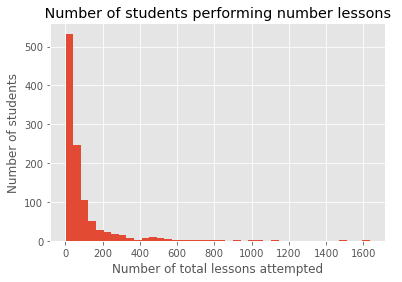

In [22]:
# Total Lessons per student

plt.title(' Number of students performing number lessons ')
plt.xlabel('Number of total lessons attempted')
plt.ylabel('Number of students')
plt.hist(y1, bins=40)




(array([ 643.,  137.,  121.,   46.,   34.,   23.,   16.,   16.,   12.,
           4.,    6.,    3.,    3.,    1.,    2.,    2.,    3.,    1.,
           0.,    0.,    0.,    1.,    1.,    0.,    1.,    0.,    1.,
           1.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.]),
 array([   1. ,    5.5,   10. ,   14.5,   19. ,   23.5,   28. ,   32.5,
          37. ,   41.5,   46. ,   50.5,   55. ,   59.5,   64. ,   68.5,
          73. ,   77.5,   82. ,   86.5,   91. ,   95.5,  100. ,  104.5,
         109. ,  113.5,  118. ,  122.5,  127. ,  131.5,  136. ,  140.5,
         145. ,  149.5,  154. ,  158.5,  163. ,  167.5,  172. ,  176.5,
         181. ]),
 <a list of 40 Patch objects>)

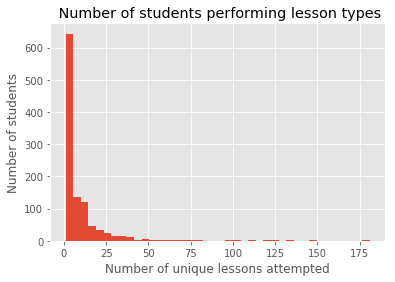

In [23]:
# Uniqe students per # of unique lessons
y2 = np.array(df_student1['lesson']['nunique'])
plt.title(' Number of students performing lesson types')
plt.xlabel('Number of unique lessons attempted')
plt.ylabel('Number of students')
plt.hist(y2, bins=40)

(array([  21.,    0.,    2.,    0.,    0.,    3.,    2.,    2.,    1.,
           1.,    5.,    3.,    1.,    5.,    7.,    2.,    6.,    4.,
           3.,    4.,   13.,    9.,    7.,   13.,   17.,   27.,   16.,
          39.,   37.,   51.,   68.,   50.,   79.,   82.,   98.,  131.,
          92.,   67.,   31.,   82.]),
 array([ 0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,  0.175,
         0.2  ,  0.225,  0.25 ,  0.275,  0.3  ,  0.325,  0.35 ,  0.375,
         0.4  ,  0.425,  0.45 ,  0.475,  0.5  ,  0.525,  0.55 ,  0.575,
         0.6  ,  0.625,  0.65 ,  0.675,  0.7  ,  0.725,  0.75 ,  0.775,
         0.8  ,  0.825,  0.85 ,  0.875,  0.9  ,  0.925,  0.95 ,  0.975,  1.   ]),
 <a list of 40 Patch objects>)

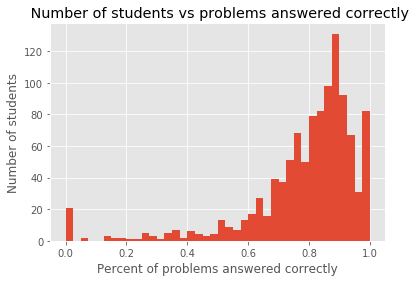

In [24]:
# Uniqe students per # of unique lessons
y3 = np.array(df_student1['percent_correct'])
plt.title(' Number of students vs problems answered correctly')
plt.xlabel('Percent of problems answered correctly')
plt.ylabel('Number of students')
plt.hist(y3, bins = 40)

In [25]:
df2.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong'],
      dtype='object')

In [26]:
df2['subject'].unique()

array(['fractions', 'review', 'decimals'], dtype=object)

In [27]:
df2.iloc[0]

_id                                              5a00f1739100de1a390000d0
behavioral_traits                                                      []
bonus                                                               False
correct                                                              True
diff                                                                    0
id                                                             nvrm82_9Yv
incomplete                                                          False
lesson                                                           nline_1b
level_summary           {'entered': True, 'path': 'nline_1b', 'lm_stat...
problem_set             lessons/fractions/lesson13_1/part_a/media/prob...
problem_set_id                                                 _Pd6uU3viE
problem_set_subspace                                                parta
qual_id                                       _Pd6uU3viE.parta.nvrm82_9Yv
randomly_selected                     

In [28]:
df2.iloc[0]['response']

{'den': '2',
 'fraction_cblock_chains': [{'lcm_sum': {'__as3_type': 'Fraction',
    'denominator': 2,
    'numerator': 1},
   'left': 97,
   'pieces': ['1/2'],
   'right': 442,
   'sum': {'__as3_type': 'Fraction', 'denominator': 2, 'numerator': 1}}],
 'fraction_cblock_containment': {},
 'fraction_cblock_counts': {'1/2': 1},
 'fraction_cblock_total_count': 1,
 'fraction_input_value': '1/2',
 'num': '1',
 'numberline_associations': [[]],
 'plain_image_groups': [{'total': 1,
   'url': 'assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf'},
  {'total': 1,
   'url': 'assets/cms/wootmath_fractions/number_line/markers/start_marker.swf'},
  {'total': 1,
   'url': 'assets/cms/wootmath_fractions/number_line/objects/dog.swf'},
  {'total': 1,
   'url': 'assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf'}],
 'whole': ''}

In [29]:
df_lesson1 = df2.groupby('lesson').agg({ 'student_id':[len,  pd.Series.nunique ], 'ntotal':sum, 'nright':sum })

In [30]:
df_lesson1['percent_correct'] = df_lesson1['nright']['sum'].astype(float) / df_lesson1['ntotal']['sum']

(array([  2.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,
          3.,   2.,   1.,   4.,   1.,   3.,   0.,   7.,   7.,   6.,   8.,
         12.,   4.,  10.,  12.,  16.,   4.,  18.,  15.,  14.,   9.,  10.,
          9.,   9.,   7.,   4.,   5.,   2.,  10.]),
 array([ 0.40433985,  0.41923136,  0.43412286,  0.44901436,  0.46390587,
         0.47879737,  0.49368888,  0.50858038,  0.52347188,  0.53836339,
         0.55325489,  0.56814639,  0.5830379 ,  0.5979294 ,  0.6128209 ,
         0.62771241,  0.64260391,  0.65749542,  0.67238692,  0.68727842,
         0.70216993,  0.71706143,  0.73195293,  0.74684444,  0.76173594,
         0.77662744,  0.79151895,  0.80641045,  0.82130196,  0.83619346,
         0.85108496,  0.86597647,  0.88086797,  0.89575947,  0.91065098,
         0.92554248,  0.94043399,  0.95532549,  0.97021699,  0.9851085 ,  1.        ]),
 <a list of 40 Patch objects>)

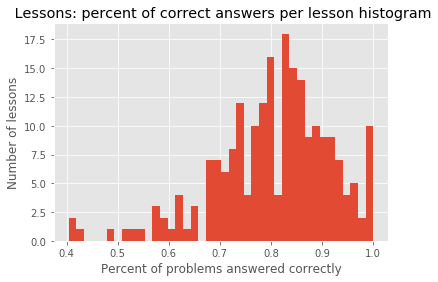

In [31]:
# Lessons and answers
y3 = np.array(df_lesson1['percent_correct'])
plt.title(' Lessons: percent of correct answers per lesson histogram')
plt.xlabel('Percent of problems answered correctly')
plt.ylabel('Number of lessons')
plt.hist(y3, bins = 40)

In [32]:
df_lesson1

student_id         ntotal nright percent_correct
                                   len nunique    sum    sum                
lesson                                                                      
add_benchmark_1                    539      49   3508   2709        0.772235
add_estimate_uncommon_den_1        233      20   1970   1517        0.770051
add_mixed_1                        105      14    701    602        0.858773
add_mixed_2                         59       7    231    162        0.701299
add_symbol_1                       109      14    716    529        0.738827
add_symbol_2                        79       9    495    407        0.822222
add_symbol_3                       111      11    638    490        0.768025
add_uncommon_den_1                 273      26   2108   1445        0.685484
add_uncommon_den_2                 198      16   1371   1092        0.796499
add_uncommon_den_2_s1               15       2     81     39        0.481481
add_uncommon_den_3                 113      15    713    556        0.779804
add_uncommon_den_4                 104      15    698    616        0.882521
add_uncommon_den_5                  80      10    539    502        0.931354
add_uncommon_den_6                  77      10    482    401        0.831950
adv_ordering_1                    1347     149  11741  10343        0.880930
adv_ordering_2                    1304     126  10128   7745        0.764712
advanced_add_0                     537      51   4259   3593        0.843625
advanced_add_1                     430      40   3446   2460        0.713871
advanced_sub_0                     333      33   2967   2184        0.736097
advanced_sub_1                     303      15   2723   1675        0.615130
basic_add_1                        868      57   7455   5297        0.710530
basic_add_2                        349      41   2808   2562        0.912393
basic_add_3                        614      34   4968   2646        0.532609
basic_add_4                        164      19    825    648        0.785455
basic_add_4_1                      150      17    863    679        0.786790
basic_add_5                         87      17    424    371        0.875000
basic_add_5_1                       89      15    465    362        0.778495
basic_ordering_1                  2588     301  20135  16780        0.833375
basic_ordering_3                   698     106   3624   3077        0.849062
basic_ordering_4                   643      71   4871   4168        0.855676
...                                ...     ...    ...    ...             ...
review_lesson_2                   3366     250  19776  16929        0.856038
review_lesson_3                    631      55   3723   3068        0.824067
review_lesson_4                     95       7    462    285        0.616883
sets_1_s1                            4       1     16     16        1.000000
sets_1_s2                            4       1     16     16        1.000000
sets_1_v2                          160      25   1042    950        0.911708
sets_2_s1                            4       1     16     16        1.000000
sets_2_s2                            9       1     72     63        0.875000
sets_2_v2                          222      25   1555   1257        0.808360
sets_3_s1                            5       1     20     15        0.750000
sets_3_s2                            4       1     16     12        0.750000
sets_3_v2                          185      25   1315   1069        0.812928
sets_4                             158      24    964    898        0.931535
simplify_0                         990      91   8164   6373        0.780622
simplify_1                         370      42   2278   1981        0.869622
simplify_2                         259      32   1522   1184        0.777924
simplify_3                         183      24    890    715        0.803371
simplify_4                         670      60   3629   2134        0.588041
simplify_5              

In [33]:
df_lesson1.sort_values('percent_correct')

student_id         ntotal nright percent_correct
                                len nunique    sum    sum                
lesson                                                                   
sub_model_2                     282      10   3272   1323        0.404340
sub_symbol_1                    256      10   2844   1174        0.412799
equivalence_8                   115       7   1151    495        0.430061
add_uncommon_den_2_s1            15       2     81     39        0.481481
mult_whole_frac_review_1        213      23   1814    935        0.515436
basic_add_3                     614      34   4968   2646        0.532609
deci_nline_4_s1                   9       2     29     16        0.551724
division_4                       61       9    483    275        0.569358
sub_model_1                     183      10   2043   1171        0.573177
mult_whole_frac_2_1             187      17   1675    964        0.575522
simplify_4                      670      60   3629   2134        0.588041
estimating_sums_s1               57       3    655    389        0.593893
division_11                     171       6   1450    867        0.597931
advanced_sub_1                  303      15   2723   1675        0.615130
review_lesson_4                  95       7    462    285        0.616883
explore_deci_12                 268      22   1437    889        0.618650
mult_scale_1                     49       3    441    273        0.619048
explore_deci_5_1                480      50   2665   1698        0.637148
sub_mixed_1                     208      13   2023   1315        0.650025
nline_0b                       1850     158  15669  10240        0.653520
mult_whole_frac_2               294      33   2419   1587        0.656056
deci_nline_2_s1                  63       8    342    231        0.675439
ordering_2_v2                   361      29   2300   1565        0.680435
ordering_8                     1473     123   9311   6352        0.682204
division_20                      41       3    319    218        0.683386
add_uncommon_den_1              273      26   2108   1445        0.685484
ordering_6                     2072     207  14507   9964        0.686841
ordering_6_s1                    75      15    297    204        0.686869
benchmark_3                     618      58   4692   3252        0.693095
mult_whole_frac_6                89      11    565    394        0.697345
...                             ...     ...    ...    ...             ...
sub_mixed_4                      14       3     66     61        0.924242
explore_deci_10                 141      24    667    617        0.925037
basic_sub_2                      95      14    619    576        0.930533
improper_1a                     112      18    626    583        0.931310
add_uncommon_den_5               80      10    539    502        0.931354
sets_4                          158      24    964    898        0.931535
mult_whole_frac_3                15       3     75     70        0.933333
ordering_3_1                    347      63   1665   1558        0.935736
mult_frac_frac_3                 29       3    183    172        0.939891
name_fract_1_s1                  63      15    252    237        0.940476
division_10                      24       5    112    106        0.946429
equivalence_4                   285      46   1787   1705        0.954113
deci_nline_5                     86      13    530    506        0.954717
basic_sub_1                      88      14    543    520        0.957643
deci_nline_9                     73      12    396    381        0.962121
model_symbol_3_s1               159      37    624    604        0.967949
equivalence_10                  371      59   2024   1961        0.968874
division_6                       33       6    193    187        0.968912
division_3                       48       9    272    267        0.981618
division_13_1                    25       5    109    107        0.981651
division_13_1s1              

In [34]:
df3  = df2.copy()

In [35]:
df3['percent_correct'] = df3['nright'].astype(float) / df3['ntotal']

In [36]:
## Make 'description' a feature wih important words mapped

In [37]:
df3.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong', 'percent_correct'],
      dtype='object')

In [38]:
df3.iloc[0]

_id                                              5a00f1739100de1a390000d0
behavioral_traits                                                      []
bonus                                                               False
correct                                                              True
diff                                                                    0
id                                                             nvrm82_9Yv
incomplete                                                          False
lesson                                                           nline_1b
level_summary           {'entered': True, 'path': 'nline_1b', 'lm_stat...
problem_set             lessons/fractions/lesson13_1/part_a/media/prob...
problem_set_id                                                 _Pd6uU3viE
problem_set_subspace                                                parta
qual_id                                       _Pd6uU3viE.parta.nvrm82_9Yv
randomly_selected                     

In [39]:
df3.iloc[0]['txt']

'Use the 1/2 pieces to figure out how far the dog traveled.\nAnswer: 1/2'

In [40]:
df3.iloc[0]['description']

'In the first part of this lesson, student partition the number line into the number of given pieces to determine how far the bug traveled. In the second part of the lesson students partition the number line and then drag the bug to the given location.\n'

In [41]:
for idx in range(100):
    print (df3.iloc[idx]['lesson'])
    print (df3.iloc[idx]['response'])

nline_1b
{'fraction_cblock_chains': [{'right': 442, 'sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}, 'pieces': ['1/2'], 'left': 97, 'lcm_sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}}], 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/start_marker.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/dog.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf'}], 'den': '2', 'fraction_input_value': '1/2', 'num': '1', 'fraction_cblock_total_count': 1, 'numberline_associations': [[]], 'fraction_cblock_counts': {'1/2': 1}, 'fraction_cblock_containment': {}, 'whole': ''}
nline_1b
{'fraction_cblock_total_count': 4, 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/panda.swf'}, {'total': 1, 'url': 'assets/c

In [42]:
my_val = (str(df3.iloc[0]['response']))
my_val = my_val.replace("': ","_")
my_val = my_val.replace("_{"," ")
my_val = my_val.replace("_[",", ")
for c in [']','[','{','}',"'",""]:
    my_val = my_val.replace(c,'')

In [43]:
my_val

'fraction_cblock_chains, right_442, sum numerator_1, denominator_2, __as3_type_Fraction, pieces, 1/2, left_97, lcm_sum numerator_1, denominator_2, __as3_type_Fraction, plain_image_groups, total_1, url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf, total_1, url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf, total_1, url_assets/cms/wootmath_fractions/number_line/objects/dog.swf, total_1, url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf, den_2, fraction_input_value_1/2, num_1, fraction_cblock_total_count_1, numberline_associations, , fraction_cblock_counts 1/2_1, fraction_cblock_containment , whole_'

In [44]:
str(df3.iloc[0]['response'])

"{'fraction_cblock_chains': [{'right': 442, 'sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}, 'pieces': ['1/2'], 'left': 97, 'lcm_sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}}], 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/start_marker.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/dog.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf'}], 'den': '2', 'fraction_input_value': '1/2', 'num': '1', 'fraction_cblock_total_count': 1, 'numberline_associations': [[]], 'fraction_cblock_counts': {'1/2': 1}, 'fraction_cblock_containment': {}, 'whole': ''}"

In [45]:
def stringify_response(resp):
    my_val = str(resp).replace("': ","_")
    my_val = my_val.replace("_{"," ")
    my_val = my_val.replace("_[",", ")
    for c in [']','[','{','}',"'","",","]:
        my_val = my_val.replace(c,'')
    return my_val


In [46]:
stringify_response(df3.iloc[0]['response'])

'fraction_cblock_chains right_442 sum numerator_1 denominator_2 __as3_type_Fraction pieces 1/2 left_97 lcm_sum numerator_1 denominator_2 __as3_type_Fraction plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/dog.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf den_2 fraction_input_value_1/2 num_1 fraction_cblock_total_count_1 numberline_associations  fraction_cblock_counts 1/2_1 fraction_cblock_containment  whole_'

In [47]:
df3['response_str'] = df3['response'].apply(stringify_response)

In [48]:
for idx in range(20):
    print (idx, df3['response_str'].iloc[idx])

0 fraction_cblock_chains right_442 sum numerator_1 denominator_2 __as3_type_Fraction pieces 1/2 left_97 lcm_sum numerator_1 denominator_2 __as3_type_Fraction plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/dog.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf den_2 fraction_input_value_1/2 num_1 fraction_cblock_total_count_1 numberline_associations  fraction_cblock_counts 1/2_1 fraction_cblock_containment  whole_
1 fraction_cblock_total_count_4 plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/objects/panda.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf input_4 fraction_cblock_chains right_856 sum numerator_1 denominator_1 __as3_type_Fraction pieces 1/4 1/4 1/4 1/4 left_165 lcm_sum numerator_4 denomina

In [49]:
df3.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong', 'percent_correct', 'response_str'],
      dtype='object')

In [50]:
df3.to_csv('data_frame_with_string_response.csv')

In [51]:
df_lesson1.to_csv('lesson_summary.csv')

In [52]:
## In Response:
### convert K, V, and all K_V into words in a text doc
### Then add text
### The add description
my_doc = df3.iloc[1]['response']

In [53]:
def make_string(elem):
    ans = ''
    if not elem:
        return ans
    for key in elem.keys():
        #print ('ans = ', ans)
        #print (type(elem[key]))
        if type(elem[key]) is str or\
                type(elem[key]) is int:
            #print ('add value', elem[key])
            value = str(elem[key])
            ans += key + '_' + value + ' ' + value + ' '
        elif type(elem[key]) is list:
            #print ('add list', elem[key])
            temp_elem = dict()
            for item in elem[key]:
                temp_elem[key] = item
                ans += make_string(temp_elem) + ' '
        elif type(elem[key]) is dict:
            #print ('add dict', elem[key])
            for item_key in elem[key].keys():
                ans += key + '_' + make_string(elem[key]) + ' '
        elif type(elem[key]) is float:
            #print ('add dict', elem[key])
            sig = 2
            value = elem[key]
            value = round(value, sig-int(floor(log10(abs(value))))-1)
            value = str(value)
            ans += key + '_' + value + ' ' + value + ' '
        ans += ' ' + key + ' '
        #print ('not handled', elem[key])
        
    return ans
        
            
            

In [54]:
my_doc2 = make_string(my_doc)

In [55]:
print (my_doc)
print (my_doc2)

{'fraction_cblock_total_count': 4, 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/panda.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/start_marker.swf'}], 'input': '4', 'fraction_cblock_chains': [{'right': 856, 'sum': {'numerator': 1, 'denominator': 1, '__as3_type': 'Fraction'}, 'pieces': ['1/4', '1/4', '1/4', '1/4'], 'left': 165, 'lcm_sum': {'numerator': 4, 'denominator': 4, '__as3_type': 'Fraction'}}], 'numberline_associations': [[{'obj_value': None, 'position': 720.6521739130434, 'pos_value': 1.0009451795841209, 'obj_name': 'object'}]], 'fraction_cblock_counts': {'1/4': 4}, 'fraction_cblock_containment': {}}
fraction_cblock_total_count_4 4  fraction_cblock_total_count plain_image_groups_total_1 1  total url_assets/cms/wootmath_fractions/number_line/objects/panda.swf assets/cms/wootmath_fractions/number_line/objects/panda.swf  url  plain_image_groups_total_1 1  total url_assets/cms/wootmath_fractions/numbe

In [56]:
df3['response_doc'] = df3['response'].map(make_string)

In [57]:
df3['response_doc'] = df3['response_doc'] + df3['txt'] + df3['description']

In [58]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace("\n", ""))

In [59]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace("?", " "))

In [60]:
df3.iloc[100]['response_doc']

"radio_group_mc2_choice_A A  choice text_Yes Yes  text  radio_group_mc2_choice_A A  choice text_Yes Yes  text   radio_group_mc2 radio_group_mc1_choice_B B  choice text_No No  text  radio_group_mc1_choice_B B  choice text_No No  text   radio_group_mc1 plain_image_groups_url_assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf  url total_1 1  total  plain_image_groups_url_assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf  url total_1 1  total   plain_image_groups  plain_image_groups_url_assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf  url total_1 1  total  plain_image_groups_url_assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf  url total_1 1  total   plain_image_groups   plain_image_groups Do thes